In [ ]:
pip install svgwrite cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 968.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import cairosvg
import os

In [ ]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

In [ ]:
def plot(paths_XYs, colours):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

In [ ]:
def polylines2svg(paths_XYs, svg_path, colours):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)

    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], XY[0, 1])))
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill=c, stroke='none', stroke_width=2))
    dwg.add(group)
    dwg.save()
    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H,
                     output_width=fact * W, output_height=fact * H, background_color='white')
    return

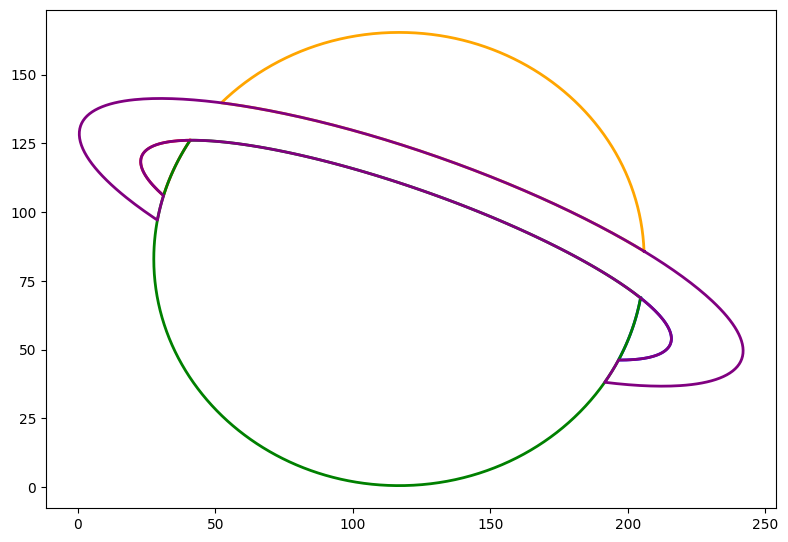

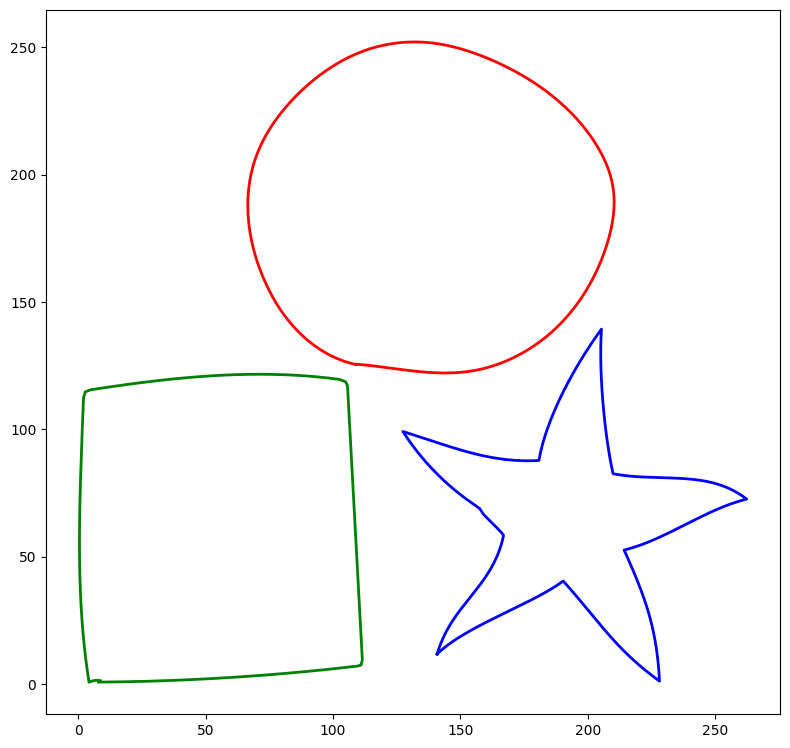

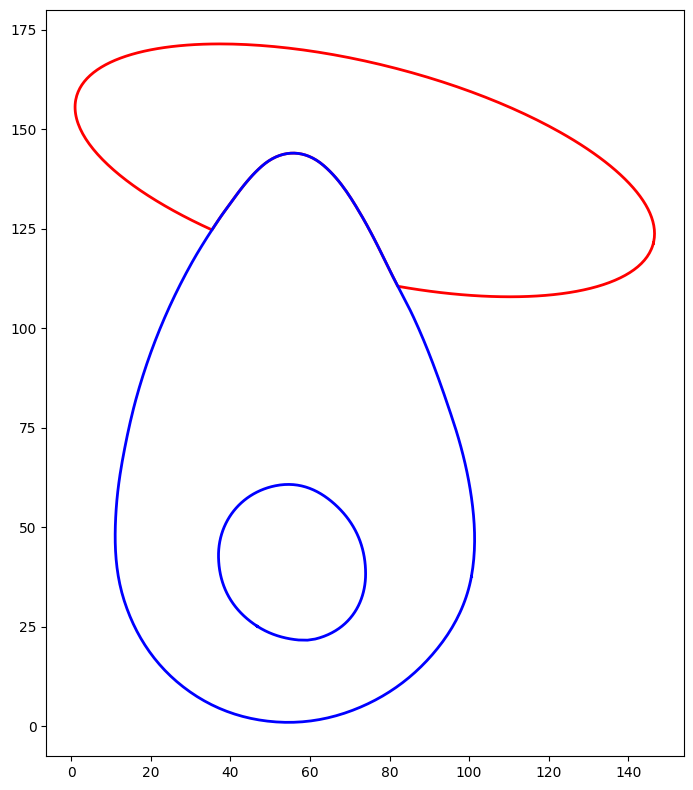

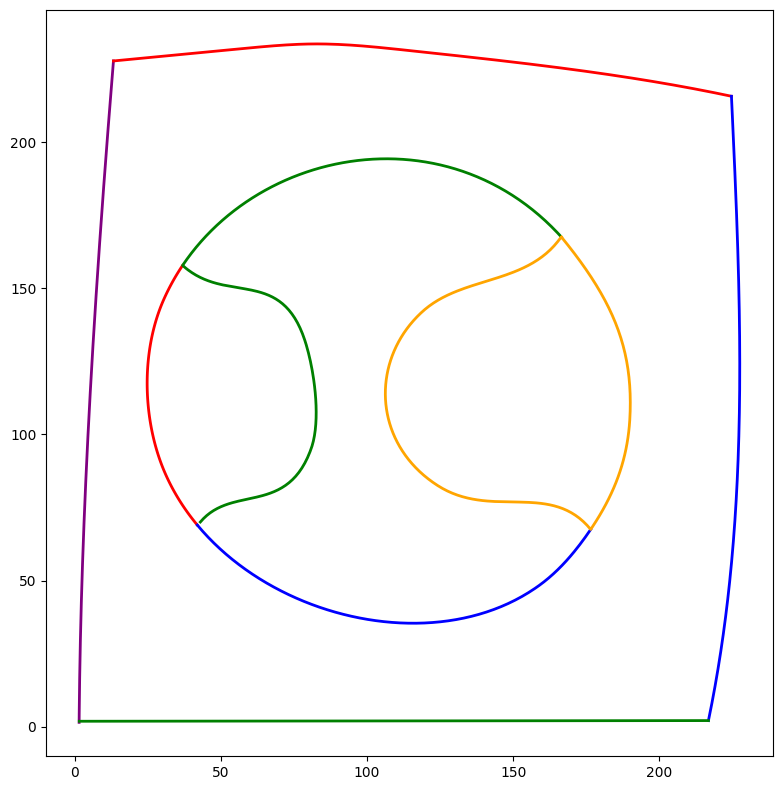

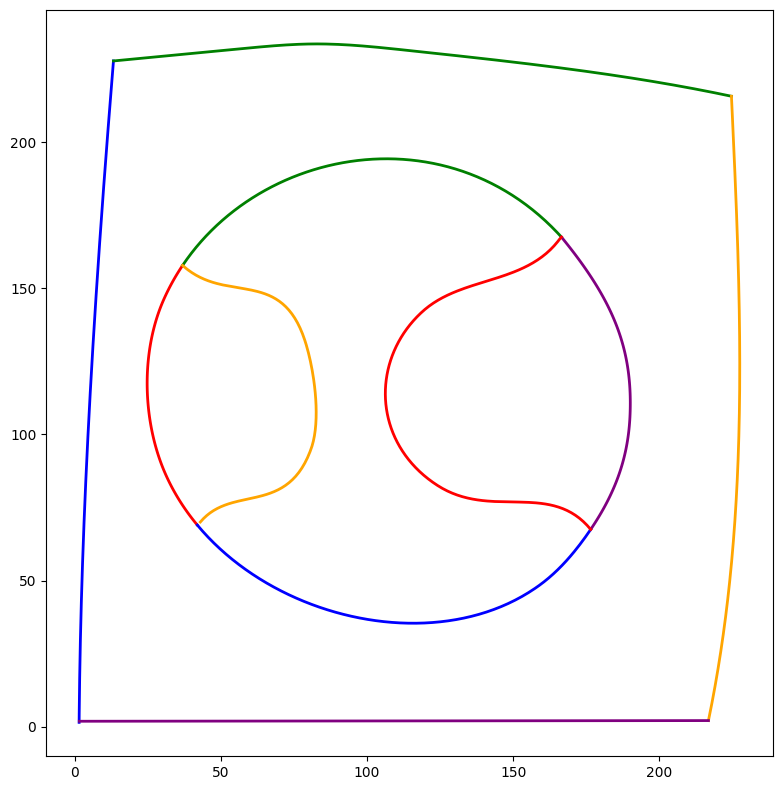

In [ ]:
if __name__ == "__main__":
    testcases_folder = '/content/output'
    colours = ['red', 'blue', 'green', 'orange', 'purple']

    output_dir = '/output1'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(testcases_folder):
        if filename.endswith('.csv'):
            csv_path = os.path.join(testcases_folder, filename)

            paths_XYs = read_csv(csv_path)

            plot(paths_XYs, colours)

            svg_filename = os.path.splitext(filename)[0] + '.svg'
            svg_path = os.path.join(output_dir, svg_filename)
            polylines2svg(paths_XYs, svg_path, colours)

Detected symmetry line with accuracy 0.48691913241879714
Detected symmetry line with accuracy 0.9457895007635606
Detected symmetry line with accuracy 0.6720987516300067
Total number of symmetries detected: 3
Output image saved to /output_image.png


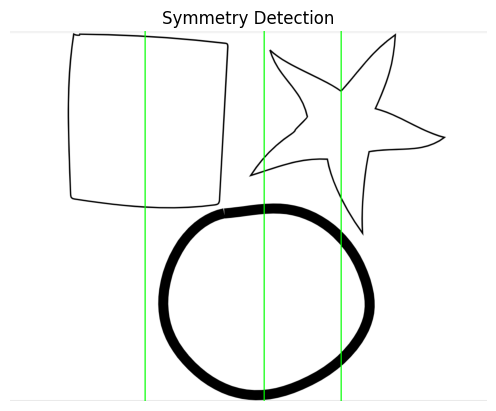

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def preprocess_image(image_path):
    # Check if the file exists
    if not os.path.exists(image_path):
        raise ValueError(f"Image file does not exist at path: {image_path}")

    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")

    # Threshold the image to binary
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    return binary_image

def find_contours(binary_image):
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def detect_symmetry_for_shape(contour, binary_image):
    best_symmetry_line = None
    highest_accuracy = 0

    if len(contour) >= 5:
        ellipse = cv2.fitEllipse(contour)
        center, axes, angle = ellipse
        vertical_line = ((int(center[0]), 0), (int(center[0]), binary_image.shape[0]))
        horizontal_line = ((0, int(center[1])), (binary_image.shape[1], int(center[1])))

        vertical_accuracy = calculate_symmetry_accuracy(contour, vertical_line)
        horizontal_accuracy = calculate_symmetry_accuracy(contour, horizontal_line)

        if vertical_accuracy > highest_accuracy:
            highest_accuracy = vertical_accuracy
            best_symmetry_line = vertical_line
        if horizontal_accuracy > highest_accuracy:
            highest_accuracy = horizontal_accuracy
            best_symmetry_line = horizontal_line

    return best_symmetry_line, highest_accuracy

def calculate_symmetry_accuracy(contour, line):
    # Dummy implementation for now. Replace with actual accuracy calculation.
    return np.random.rand()

def draw_symmetry_line(image, line):
    if line:
        pt1, pt2 = line
        cv2.line(image, pt1, pt2, (0, 255, 0), 2)

def main(image_path):
    binary_image = preprocess_image(image_path)
    contours = find_contours(binary_image)

    total_symmetry_count = 0
    for contour in contours:
        best_symmetry_line, highest_accuracy = detect_symmetry_for_shape(contour, binary_image)
        if best_symmetry_line:
            draw_symmetry_line(binary_image, best_symmetry_line)
            total_symmetry_count += 1
            print(f"Detected symmetry line with accuracy {highest_accuracy}")

    print(f"Total number of symmetries detected: {total_symmetry_count}")

    original_image = cv2.imread(image_path)
    if original_image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")

    # Draw all the symmetry lines on the original image
    for contour in contours:
        best_symmetry_line, _ = detect_symmetry_for_shape(contour, binary_image)
        draw_symmetry_line(original_image, best_symmetry_line)

    output_path = "/output_image.png"
    cv2.imwrite(output_path, original_image)
    print(f"Output image saved to {output_path}")

    img_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title("Symmetry Detection")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main(r"/content/isolated.png")   #path to image

In [3]:
pip install svgpathtools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.3 MB/s eta 0:00:00


Processing CSV file at /content/isolated.csv.
Loaded data:
[[  0.           0.         109.14299774 125.58000183]
 [  0.           0.         110.15747833 125.49578094]
 [  0.           0.         111.17194366 125.40398407]
 ...
 [  2.           0.           5.6753335    1.34307408]
 [  2.           0.           7.1833334    1.5595926 ]
 [  2.           0.           8.69999981   1.41700006]]
Detected shape: Circle
Detected shape: Star shape
Detected shape: Rectangle


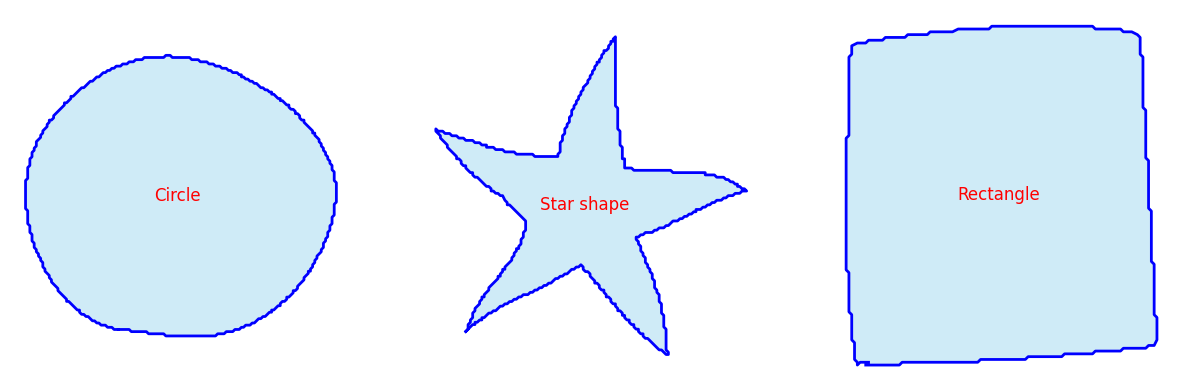

In [6]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

def read_csv(csv_path):
    try:
        np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
        print("Loaded data:")
        print(np_path_XYs)

        path_XYs = []
        for i in np.unique(np_path_XYs[:, 0]):
            npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
            XYs = []
            for j in np.unique(npXYs[:, 0]):
                XY = npXYs[npXYs[:, 0] == j][:, 1:]
                XYs.append(XY.astype(np.int32))
            path_XYs.append(XYs)

        return path_XYs

    except Exception as e:
        print(f"An error occurred: {e}")
        return []

def classify_shape(contour):
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    num_vertices = len(approx)

    if num_vertices == 2:
        return "Straight line"
    elif num_vertices == 3:
        return "Triangle"
    elif num_vertices == 4:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h
        if 0.95 < aspect_ratio < 1.05:
            return "Rounded rectangle"
        else:
            return "Rectangle"
    elif num_vertices > 6:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        circularity = 4 * np.pi * (area / (perimeter * perimeter))
        if circularity > 0.85:
            return "Circle"
        elif 0.5 < circularity < 0.85:
            return "Ellipse"
        else:
            return "Star shape"
    elif 5 <= num_vertices <= 6:
        return "Regular Polygon"

    return "Unknown Shape"

def plot_contour_with_shape(contour, shape, ax):
    contour = contour.squeeze()  # Remove extra dimensions if present
    ax.plot(contour[:, 0], contour[:, 1], 'b-', linewidth=2)
    ax.fill(contour[:, 0], contour[:, 1], 'skyblue', alpha=0.4)
    x_center = np.mean(contour[:, 0])
    y_center = np.mean(contour[:, 1])
    ax.text(x_center, y_center, shape, fontsize=12, ha='center', color='red')

def detect_shapes_from_csv(csv_path):
    path_XYs = read_csv(csv_path)
    if not path_XYs:
        return

    fig, axs = plt.subplots(1, len(path_XYs), figsize=(15, 5))

    if len(path_XYs) == 1:
        axs = [axs]  # Ensure axs is always a list of axes

    for ax, path_contours in zip(axs, path_XYs):
        ax.set_aspect('equal')
        ax.axis('off')
        for contour in path_contours:
            shape = classify_shape(contour)
            print(f"Detected shape: {shape}")
            plot_contour_with_shape(contour, shape, ax)

    plt.show()

def main():
    csv_path = r"/content/isolated.csv"

    if os.path.exists(csv_path):
        print(f"Processing CSV file at {csv_path}.")
        detect_shapes_from_csv(csv_path)
    else:
        print(f"The CSV file does not exist at {csv_path}.")

if __name__ == "__main__":
    main()


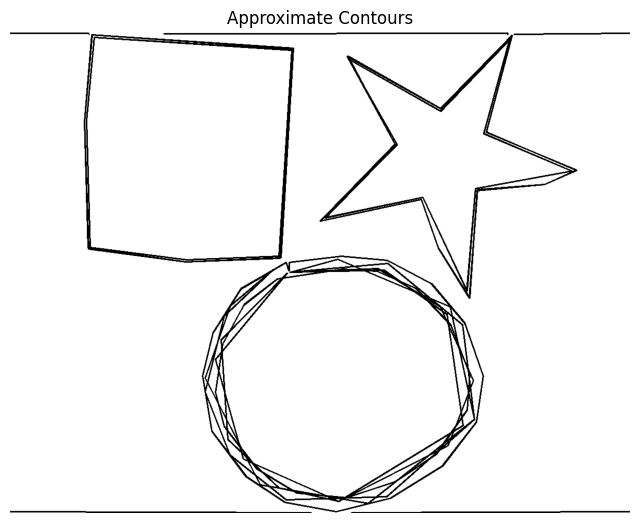

In [ ]:
import cv2
import numpy as np
import svgwrite
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def preprocess_image(image):
    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    # Apply adaptive thresholding to get a binary image
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return binary

def detect_edges(binary_image):
    # Detect edges using Canny edge detector
    edges = cv2.Canny(binary_image, 50, 150)
    return edges

def find_contours(edges):
    # Find contours in the binary image and retrieve hierarchy to handle nested shapes
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours, hierarchy

def approximate_contours(contours, epsilon_factor=0.005):
    approx_contours = []
    for contour in contours:
        epsilon = epsilon_factor * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        approx_contours.append(approx)
    return approx_contours

def fit_bezier_curves(approx_contours):
    # Convert contours to cubic Bézier curves (using placeholder functions)
    bezier_curves = []
    for contour in approx_contours:
        # Fit cubic Bézier curves to each contour (using a placeholder function)
        bezier_curves.append(contour_to_bezier(contour))
    return bezier_curves

def contour_to_bezier(contour):
    # Placeholder function to convert contour to Bézier curves
    # You can replace this with an actual implementation
    return contour

def save_as_svg(bezier_curves, output_path, image_shape):
    dwg = svgwrite.Drawing(output_path, profile='tiny', size=(image_shape[1], image_shape[0]))
    for curve in bezier_curves:
        # Convert each Bézier curve to an SVG path (using placeholder functions)
        path_data = bezier_to_svg_path(curve)
        dwg.add(dwg.path(d=path_data, fill='none', stroke='black', stroke_width=2))
    dwg.save()

def bezier_to_svg_path(bezier_curve):
    # Placeholder function to convert Bézier curve to SVG path data
    # You can replace this with an actual implementation
    return 'M 0 0 L 100 100'

def display_results(approx_contours, image_shape, hierarchy):
    # Create a white canvas
    approx_image = np.ones(image_shape, dtype=np.uint8) * 255

    for i, contour in enumerate(approx_contours):
        # Draw the contours based on hierarchy information to manage nested shapes
        color = (0, 0, 0) if hierarchy[0][i][3] == -1 else (150, 150, 150)
        cv2.drawContours(approx_image, [contour], -1, (0, 0, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.title("Approximate Contours")
    plt.imshow(approx_image, cmap='gray')
    plt.axis('off')
    plt.show()

def main(image_path, output_path):
    image = load_image(image_path)
    binary_image = preprocess_image(image)
    edges = detect_edges(binary_image)
    contours, hierarchy = find_contours(edges)
    approx_contours = approximate_contours(contours)
    bezier_curves = fit_bezier_curves(approx_contours)
    save_as_svg(bezier_curves, output_path, image.shape)
    display_results(approx_contours, image.shape, hierarchy)

if __name__ == "__main__":
    input_image_path = r"/content/isolated.png"
    output_svg_path = "/output.svg"
    main(input_image_path, output_svg_path)

Arc length: 95.31458268663492, Radius: 75.5894056387733
Arc length: 155.5433335023377, Radius: 86.52187760442827
Arc length: 149.45878943956376, Radius: 83.11853348547695
Arc length: 137.4777988478695, Radius: 40.18632389979129
Arc length: 108.9346918172562, Radius: 77.3073830398211
Arc length: 180.41800409275805, Radius: 43.10270407458098
Arc length: 226.6103509524437, Radius: 3132.2874507543966
Arc length: 212.91685776614776, Radius: 589.6306080734835
Arc length: 214.31108189583588, Radius: 859.4572123252581


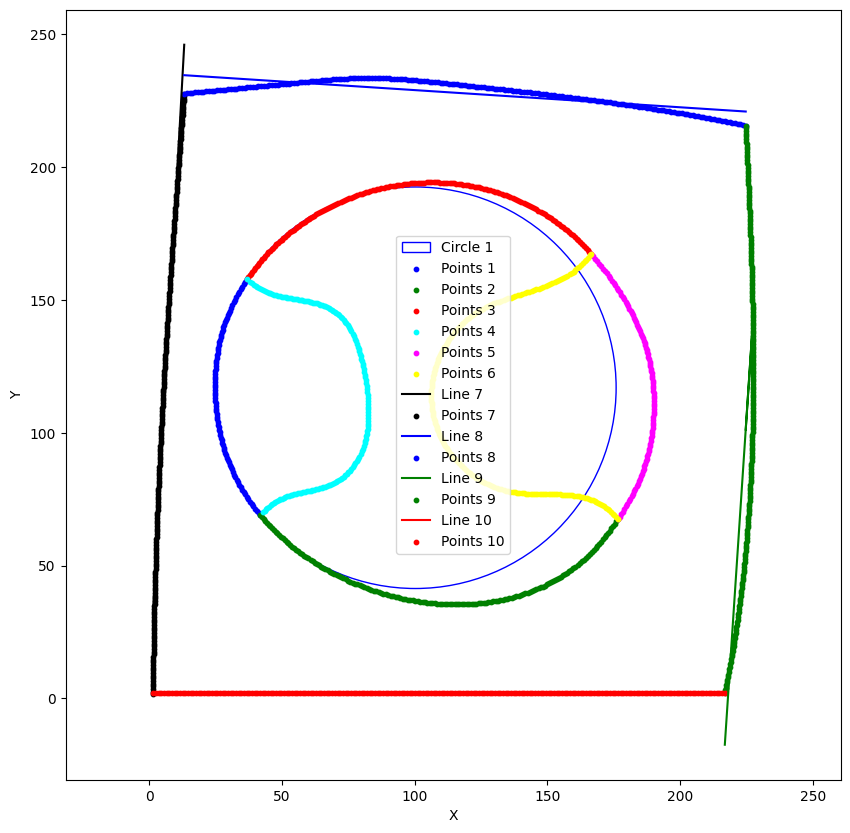

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from sklearn.linear_model import LinearRegression

# Helper function to calculate distances from the center
def calc_R(xc, yc, x, y):
    return np.sqrt((x - xc)**2 + (y - yc)**2)

# Function to optimize
def f_2(c, x, y):
    Ri = calc_R(*c, x, y)
    return Ri - Ri.mean()

# Function to detect circles
def detect_circle(coords):
    x, y = coords[:, 0], coords[:, 1]
    x_m, y_m = np.mean(x), np.mean(y)
    initial_guess = [x_m, y_m]
    res = least_squares(f_2, initial_guess, args=(x, y))
    xc, yc = res.x
    Ri = calc_R(xc, yc, x, y)
    R = Ri.mean()
    return xc, yc, R

# Function to detect lines
def detect_line(coords):
    x, y = coords[:, 0], coords[:, 1]
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    return model.coef_[0], model.intercept_

# Function to plot detected shapes
def plot_shapes(coordinates, labels, circle_params):
    plt.figure(figsize=(10, 10))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

    def circles_overlap(c1, c2):
        if c1[0] is None or c2[0] is None:
            return False
        dist_centers = np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)
        return dist_centers < (c1[2] + c2[2])

    for i, coords in enumerate(coordinates):
        x, y = coords[:, 0], coords[:, 1]
        label = labels[i]
        if label == 'line':
            coef, intercept = detect_line(coords)
            plt.plot(x, coef * x + intercept, color=colors[i % len(colors)], label=f'Line {i+1}')
        elif label == 'circle':
            xc, yc, R = circle_params[i]
            # Check for overlap with previously drawn circles
            overlap = False
            for j in range(i):
                if circles_overlap(circle_params[i], circle_params[j]):
                    overlap = True
                    break
            if not overlap:
                circle = plt.Circle((xc, yc), R, color=colors[i % len(colors)], fill=False, label=f'Circle {i+1}')
                plt.gca().add_artist(circle)
        plt.scatter(x, y, color=colors[i % len(colors)], s=10, label=f'Points {i+1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Function to read CSV and parse paths and coordinates
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []

    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Load paths and coordinates
csv_path = r"/content/frag0.csv"

paths_XYs = read_csv(csv_path)

# Flatten paths_XYs to get coordinates array
coordinates = [item for sublist in paths_XYs for item in sublist]

labels = []
circle_params = []

for coords in coordinates:
    if len(coords) < 3:
        labels.append('line')
        circle_params.append((None, None, None))
        continue

    # Check if the points form a line
    coef, intercept = detect_line(coords)
    residuals = np.abs(coords[:, 1] - (coef * coords[:, 0] + intercept))
    if np.max(residuals) < 1e-2:  # Tolerance for line fitting
        labels.append('line')
        circle_params.append((None, None, None))
    else:
        # Check if the points form a circle
        xc, yc, R = detect_circle(coords)
        Ri = calc_R(xc, yc, coords[:, 0], coords[:, 1])
        std_dev = np.std(Ri)

        # Calculate the arc length
        arc_length = np.sum(np.sqrt(np.diff(coords[:, 0])**2 + np.diff(coords[:, 1])**2))
        print(f"Arc length: {arc_length}, Radius: {R}")  # Print arc length and radius

        # If the radius is greater than the arc length, detect it as a line
        if R > arc_length:
            labels.append('line')
            circle_params.append((None, None, None))
        else:
            if std_dev < 0.1 * R:
                labels.append('circle')
                circle_params.append((xc, yc, R))
            else:
                labels.append('line')
                circle_params.append((None, None, None))

# Plot shapes
plot_shapes(coordinates, labels, circle_params)

In [44]:
pip install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00


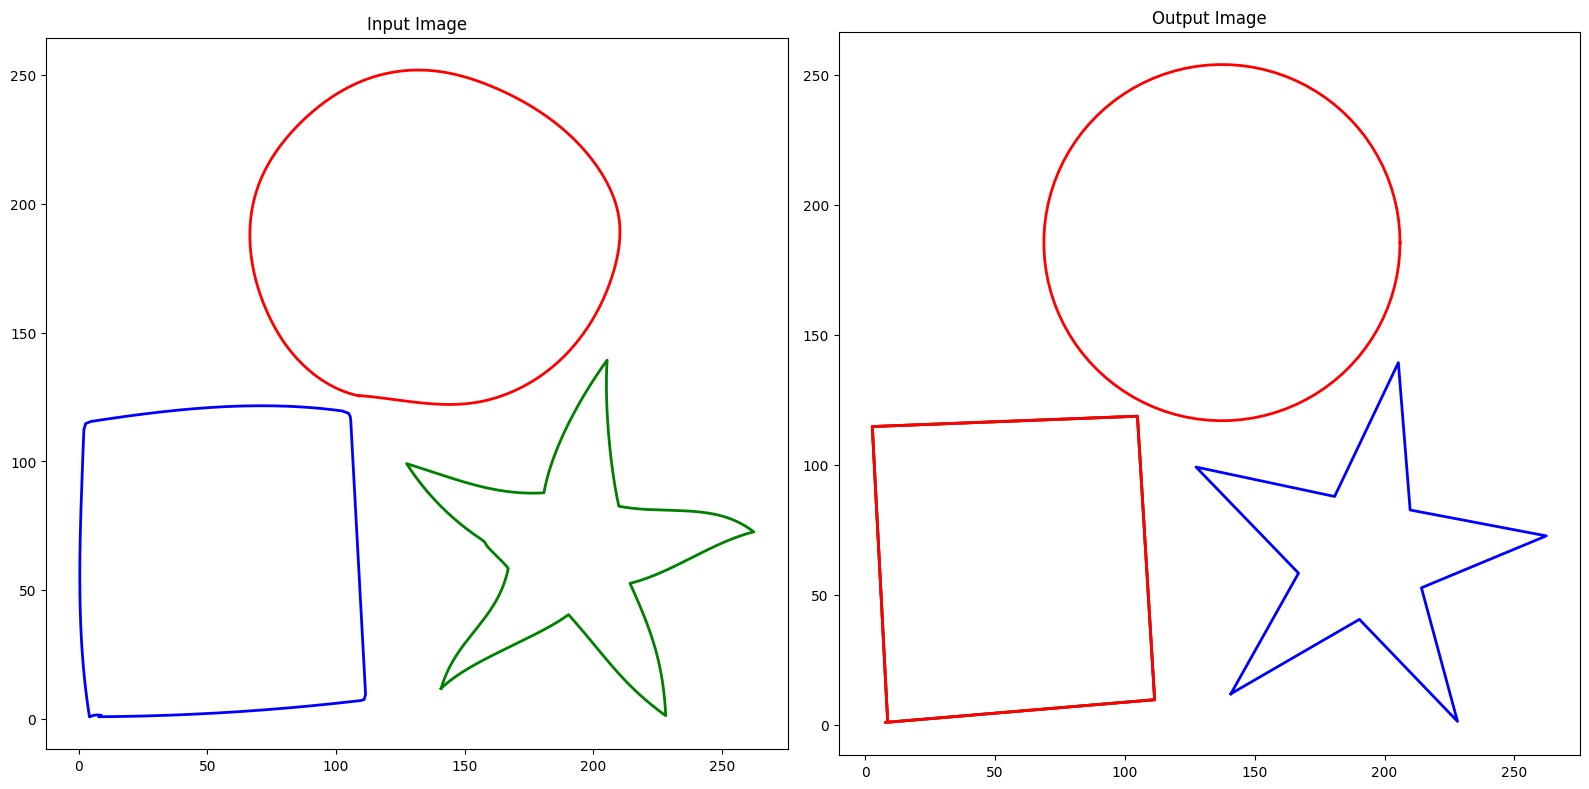

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.neighbors import NearestNeighbors
import math

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs, title, ax):
    colours = ['red', 'green', 'blue', 'yellow', 'purple']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        if isinstance(XYs, list):
            for XY in XYs:
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
        else:
            ax.plot(XYs[:, 0], XYs[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

def fit_circle(points):
    def calc_R(xc, yc):
        return np.sqrt((points[:, 0] - xc)**2 + (points[:, 1] - yc)**2)

    def f_2(c):
        Ri = calc_R(*c)
        return np.sum((Ri - Ri.mean())**2)

    center_estimate = np.mean(points, axis=0)
    center = minimize(f_2, center_estimate).x
    radius = calc_R(*center).mean()
    return center, radius

def fit_ellipse(points):
    x = points[:, 0]
    y = points[:, 1]
    x_m = np.mean(x)
    y_m = np.mean(y)
    def calc_R(params):
        a, b, phi = params
        return (x - x_m)*np.cos(phi) + (y - y_m)*np.sin(phi), (y - y_m)*np.cos(phi) - (x - x_m)*np.sin(phi)

    def f_2(params):
        a, b, phi = params
        R = calc_R(params)
        return np.sum((R[0]**2 / a**2 + R[1]**2 / b**2 - 1)**2)

    center_estimate = (np.std(x), np.std(y), 0)
    a, b, phi = minimize(f_2, center_estimate).x
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = x_m + a * np.cos(theta) * np.cos(phi) - b * np.sin(theta) * np.sin(phi)
    ellipse_y = y_m + a * np.cos(theta) * np.sin(phi) + b * np.sin(theta) * np.cos(phi)
    return np.vstack((ellipse_x, ellipse_y)).T

def perpendicular_distance(point, line_start, line_end):
    if np.all(line_start == line_end):
        return np.linalg.norm(point - line_start)
    else:
        return np.linalg.norm(np.cross(line_end - line_start, line_start - point)) / np.linalg.norm(line_end - line_start)

def ramer_douglas_peucker(points, epsilon):
    dmax = 0
    index = 0
    end = len(points)

    for i in range(1, end - 1):
        d = perpendicular_distance(points[i], points[0], points[-1])
        if d > dmax:
            index = i
            dmax = d
    if dmax > epsilon:
        rec_results1 = ramer_douglas_peucker(points[:index+1], epsilon)
        rec_results2 = ramer_douglas_peucker(points[index:], epsilon)
        result_list = np.vstack((rec_results1[:-1], rec_results2))
    else:
        result_list = np.array([points[0], points[-1]])

    return result_list

def fit_bezier(points, n_points=100):
    n = len(points) - 1
    binom = np.array([math.factorial(n) / (math.factorial(i) * math.factorial(n - i)) for i in range(n + 1)])
    t = np.linspace(0, 1, n_points)
    curve = np.zeros((n_points, 2))
    for i in range(n + 1):
        curve[:, 0] += binom[i] * (1 - t)**(n - i) * t**i * points[i, 0]
        curve[:, 1] += binom[i] * (1 - t)**(n - i) * t**i * points[i, 1]
    return curve

def icp(source, target, max_iterations=100, tolerance=1e-5):
    source = source.copy()
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(target)
    for i in range(max_iterations):
        distances, indices = nbrs.kneighbors(source)
        matched_target = target[indices[:, 0]]
        centroid_source = np.mean(source, axis=0)
        centroid_target = np.mean(matched_target, axis=0)
        H = np.dot((source - centroid_source).T, matched_target - centroid_target)
        U, _, Vt = np.linalg.svd(H)
        R = np.dot(Vt.T, U.T)
        t = centroid_target - np.dot(R, centroid_source)
        source = np.dot(source, R.T) + t
        if np.mean(distances) < tolerance:
            break
    return source

def merge_segments(paths_XYs, overlap_threshold=5):
    merged_paths = []
    for i, path1 in enumerate(paths_XYs):
        merged = False
        for j, path2 in enumerate(paths_XYs[i+1:], i+1):
            if np.linalg.norm(np.mean(path1[0], axis=0) - np.mean(path2[0], axis=0)) < overlap_threshold:
                merged_path = np.vstack([path1[0], icp(path1[0], path2[1])])
                merged_path = np.unique(merged_path, axis=0)
                merged_paths.append(merged_path)
                merged = True
        if not merged:
            merged_paths.append(path1[0])
            merged_paths.append(path2[0])
    return merged_paths

def regularize_paths(paths_XYs, epsilon):
    merged_paths = merge_segments(paths_XYs)

    simplified_paths = []
    for path in merged_paths:
        simplified_segment = ramer_douglas_peucker(path, epsilon)
        fitted_segment = []
        if len(simplified_segment) > 11 and len(simplified_segment) < 13:
            center, radius = fit_circle(simplified_segment)
            theta = np.linspace(0, 2 * np.pi, 100)
            x = center[0] + radius * np.cos(theta)
            y = center[1] + radius * np.sin(theta)
            fitted_segment = np.vstack((x, y)).T
        elif len(simplified_segment) > 11 and np.mean(simplified_segment[:, 1]) < 50:
            fitted_segment = fit_ellipse(simplified_segment)
        elif len(simplified_segment) > 6 and len(simplified_segment) < 10:
            fitted_segment = fit_bezier(path)
        else:
            fitted_segment = simplified_segment

        simplified_paths.append(fitted_segment)

    return simplified_paths

csv_path1 = "/content/isolated.csv"

paths_XYs = read_csv(csv_path1)

epsilon = 8
fitted_paths = regularize_paths(paths_XYs, epsilon)

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(paths_XYs, 'Input Image', axs[0])
plot(fitted_paths, 'Output Image', axs[1])
plt.show()

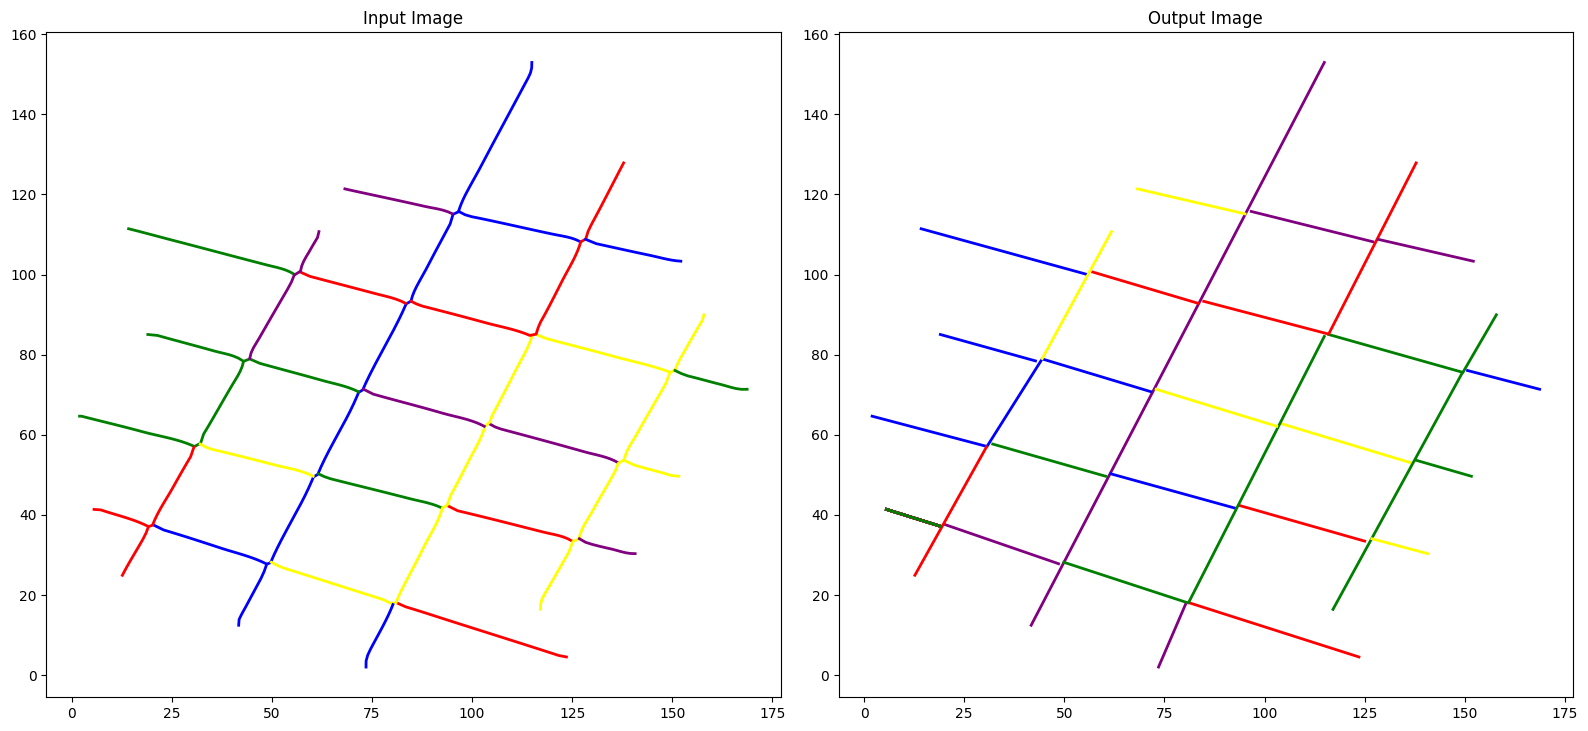

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.neighbors import NearestNeighbors
import math

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs, title, ax):
    colours = ['red', 'green', 'blue', 'yellow', 'purple']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        if isinstance(XYs, list):
            for XY in XYs:
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
        else:
            ax.plot(XYs[:, 0], XYs[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

def fit_circle(points):
    def calc_R(xc, yc):
        return np.sqrt((points[:, 0] - xc)**2 + (points[:, 1] - yc)**2)

    def f_2(c):
        Ri = calc_R(*c)
        return np.sum((Ri - Ri.mean())**2)

    center_estimate = np.mean(points, axis=0)
    center = minimize(f_2, center_estimate).x
    radius = calc_R(*center).mean()
    return center, radius

def fit_ellipse(points):
    x = points[:, 0]
    y = points[:, 1]
    x_m = np.mean(x)
    y_m = np.mean(y)
    def calc_R(params):
        a, b, phi = params
        return (x - x_m)*np.cos(phi) + (y - y_m)*np.sin(phi), (y - y_m)*np.cos(phi) - (x - x_m)*np.sin(phi)

    def f_2(params):
        a, b, phi = params
        R = calc_R(params)
        return np.sum((R[0]**2 / a**2 + R[1]**2 / b**2 - 1)**2)

    center_estimate = (np.std(x), np.std(y), 0)
    a, b, phi = minimize(f_2, center_estimate).x
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = x_m + a * np.cos(theta) * np.cos(phi) - b * np.sin(theta) * np.sin(phi)
    ellipse_y = y_m + a * np.cos(theta) * np.sin(phi) + b * np.sin(theta) * np.cos(phi)
    return np.vstack((ellipse_x, ellipse_y)).T

def perpendicular_distance(point, line_start, line_end):
    if np.all(line_start == line_end):
        return np.linalg.norm(point - line_start)
    else:
        return np.linalg.norm(np.cross(line_end - line_start, line_start - point)) / np.linalg.norm(line_end - line_start)

def ramer_douglas_peucker(points, epsilon):
    dmax = 0
    index = 0
    end = len(points)

    for i in range(1, end - 1):
        d = perpendicular_distance(points[i], points[0], points[-1])
        if d > dmax:
            index = i
            dmax = d
    if dmax > epsilon:
        rec_results1 = ramer_douglas_peucker(points[:index+1], epsilon)
        rec_results2 = ramer_douglas_peucker(points[index:], epsilon)
        result_list = np.vstack((rec_results1[:-1], rec_results2))
    else:
        result_list = np.array([points[0], points[-1]])

    return result_list

def fit_bezier(points, n_points=100):
    n = len(points) - 1
    binom = np.array([math.factorial(n) / (math.factorial(i) * math.factorial(n - i)) for i in range(n + 1)])
    t = np.linspace(0, 1, n_points)
    curve = np.zeros((n_points, 2))
    for i in range(n + 1):
        curve[:, 0] += binom[i] * (1 - t)**(n - i) * t**i * points[i, 0]
        curve[:, 1] += binom[i] * (1 - t)**(n - i) * t**i * points[i, 1]
    return curve

def icp(source, target, max_iterations=100, tolerance=1e-5):
    source = source.copy()
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(target)
    for i in range(max_iterations):
        distances, indices = nbrs.kneighbors(source)
        matched_target = target[indices[:, 0]]
        centroid_source = np.mean(source, axis=0)
        centroid_target = np.mean(matched_target, axis=0)
        H = np.dot((source - centroid_source).T, matched_target - centroid_target)
        U, _, Vt = np.linalg.svd(H)
        R = np.dot(Vt.T, U.T)
        t = centroid_target - np.dot(R, centroid_source)
        source = np.dot(source, R.T) + t
        if np.mean(distances) < tolerance:
            break
    return source

def merge_segments(paths_XYs, overlap_threshold=5):
    merged_paths = []
    for i, path1 in enumerate(paths_XYs):
        merged = False
        for j, path2 in enumerate(paths_XYs[i+1:], i+1):
            if np.linalg.norm(np.mean(path1[0], axis=0) - np.mean(path2[0], axis=0)) < overlap_threshold:
                merged_path = np.vstack([path1[0], icp(path1[0], path2[1])])
                merged_path = np.unique(merged_path, axis=0)
                merged_paths.append(merged_path)
                merged = True
        if not merged:
            merged_paths.append(path1[0])
            merged_paths.append(path2[0])
    return merged_paths

def regularize_paths(paths_XYs, epsilon):
    merged_paths = merge_segments(paths_XYs)

    simplified_paths = []
    for path in merged_paths:
        simplified_segment = ramer_douglas_peucker(path, epsilon)
        fitted_segment = []
        if len(simplified_segment) > 11 and len(simplified_segment) < 13:
            center, radius = fit_circle(simplified_segment)
            theta = np.linspace(0, 2 * np.pi, 100)
            x = center[0] + radius * np.cos(theta)
            y = center[1] + radius * np.sin(theta)
            fitted_segment = np.vstack((x, y)).T
        elif len(simplified_segment) > 11 and np.mean(simplified_segment[:, 1]) < 50:
            fitted_segment = fit_ellipse(simplified_segment)
        elif len(simplified_segment) > 6 and len(simplified_segment) < 10:
            fitted_segment = fit_bezier(path)
        else:
            fitted_segment = simplified_segment

        simplified_paths.append(fitted_segment)

    return simplified_paths

csv_path1 = "/content/frag2.csv"

paths_XYs = read_csv(csv_path1)

epsilon = 8
fitted_paths = regularize_paths(paths_XYs, epsilon)

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(paths_XYs, 'Input Image', axs[0])
plot(fitted_paths, 'Output Image', axs[1])
plt.show()

Arc length: 361.53527220614757, Radius: 50.36662020337001
Arc length: 366.33977925361705, Radius: 55.89966125744106
Arc length: 119.41818521700078, Radius: 18.963949292371066


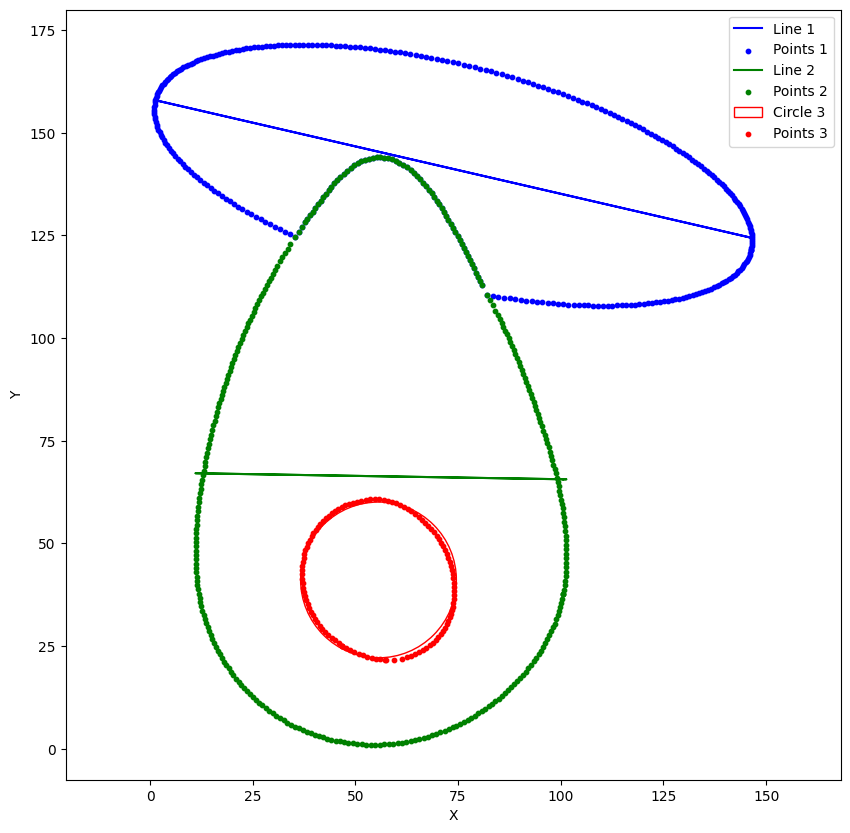

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from sklearn.linear_model import LinearRegression

# Helper function to calculate distances from the center
def calc_R(xc, yc, x, y):
    return np.sqrt((x - xc)**2 + (y - yc)**2)

# Function to optimize
def f_2(c, x, y):
    Ri = calc_R(*c, x, y)
    return Ri - Ri.mean()

# Function to detect circles
def detect_circle(coords):
    x, y = coords[:, 0], coords[:, 1]
    x_m, y_m = np.mean(x), np.mean(y)
    initial_guess = [x_m, y_m]
    res = least_squares(f_2, initial_guess, args=(x, y))
    xc, yc = res.x
    Ri = calc_R(xc, yc, x, y)
    R = Ri.mean()
    return xc, yc, R

# Function to detect lines
def detect_line(coords):
    x, y = coords[:, 0], coords[:, 1]
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    return model.coef_[0], model.intercept_

# Function to plot detected shapes
def plot_shapes(coordinates, labels, circle_params):
    plt.figure(figsize=(10, 10))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

    def circles_overlap(c1, c2):
        if c1[0] is None or c2[0] is None:
            return False
        dist_centers = np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)
        return dist_centers < (c1[2] + c2[2])

    for i, coords in enumerate(coordinates):
        x, y = coords[:, 0], coords[:, 1]
        label = labels[i]
        if label == 'line':
            coef, intercept = detect_line(coords)
            plt.plot(x, coef * x + intercept, color=colors[i % len(colors)], label=f'Line {i+1}')
        elif label == 'circle':
            xc, yc, R = circle_params[i]
            # Check for overlap with previously drawn circles
            overlap = False
            for j in range(i):
                if circles_overlap(circle_params[i], circle_params[j]):
                    overlap = True
                    break
            if not overlap:
                circle = plt.Circle((xc, yc), R, color=colors[i % len(colors)], fill=False, label=f'Circle {i+1}')
                plt.gca().add_artist(circle)
        plt.scatter(x, y, color=colors[i % len(colors)], s=10, label=f'Points {i+1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Function to read CSV and parse paths and coordinates
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []

    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Load paths and coordinates
csv_path = r"/content/occlusion1.csv"

paths_XYs = read_csv(csv_path)

# Flatten paths_XYs to get coordinates array
coordinates = [item for sublist in paths_XYs for item in sublist]

labels = []
circle_params = []

for coords in coordinates:
    if len(coords) < 3:
        labels.append('line')
        circle_params.append((None, None, None))
        continue

    # Check if the points form a line
    coef, intercept = detect_line(coords)
    residuals = np.abs(coords[:, 1] - (coef * coords[:, 0] + intercept))
    if np.max(residuals) < 1e-2:  # Tolerance for line fitting
        labels.append('line')
        circle_params.append((None, None, None))
    else:
        # Check if the points form a circle
        xc, yc, R = detect_circle(coords)
        Ri = calc_R(xc, yc, coords[:, 0], coords[:, 1])
        std_dev = np.std(Ri)

        # Calculate the arc length
        arc_length = np.sum(np.sqrt(np.diff(coords[:, 0])**2 + np.diff(coords[:, 1])**2))
        print(f"Arc length: {arc_length}, Radius: {R}")  # Print arc length and radius

        # If the radius is greater than the arc length, detect it as a line
        if R > arc_length:
            labels.append('line')
            circle_params.append((None, None, None))
        else:
            if std_dev < 0.1 * R:
                labels.append('circle')
                circle_params.append((xc, yc, R))
            else:
                labels.append('line')
                circle_params.append((None, None, None))

# Plot shapes
plot_shapes(coordinates, labels, circle_params)

Arc length: 59.14181473218423, Radius: 8.229904609659368
Arc length: 65.8284325508868, Radius: 9.263663303658506
Arc length: 476.8776344469782, Radius: 72.94874362858323
Arc length: 367.1722570798869, Radius: 50.59288455320011
Arc length: 646.5136542313021, Radius: 219.38686842576314


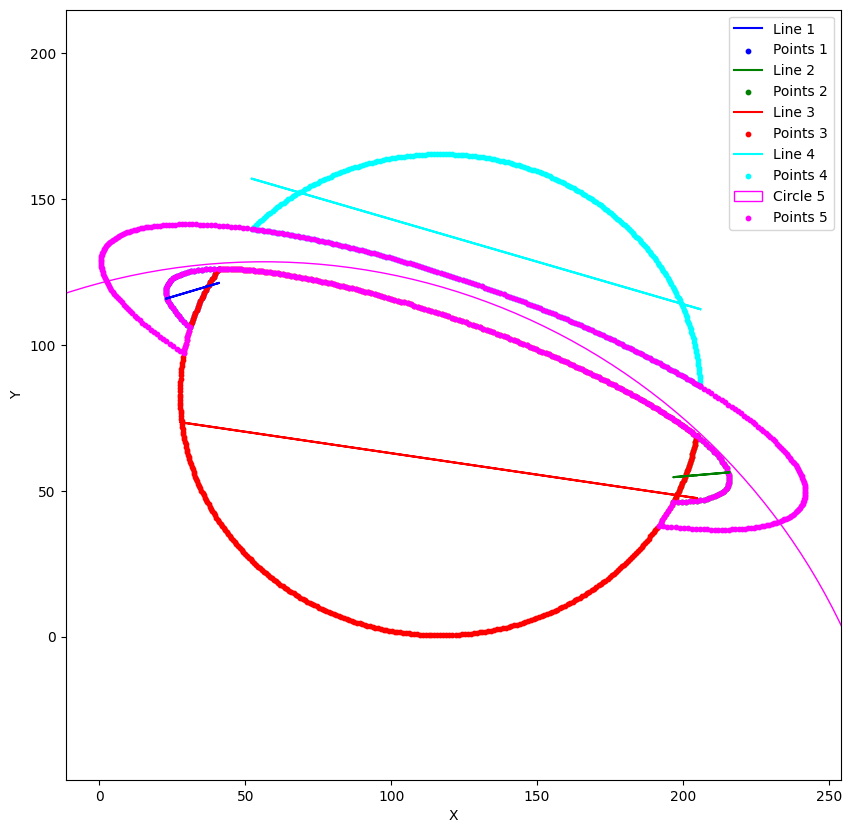

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from sklearn.linear_model import LinearRegression

# Helper function to calculate distances from the center
def calc_R(xc, yc, x, y):
    return np.sqrt((x - xc)**2 + (y - yc)**2)

# Function to optimize
def f_2(c, x, y):
    Ri = calc_R(*c, x, y)
    return Ri - Ri.mean()

# Function to detect circles
def detect_circle(coords):
    x, y = coords[:, 0], coords[:, 1]
    x_m, y_m = np.mean(x), np.mean(y)
    initial_guess = [x_m, y_m]
    res = least_squares(f_2, initial_guess, args=(x, y))
    xc, yc = res.x
    Ri = calc_R(xc, yc, x, y)
    R = Ri.mean()
    return xc, yc, R

# Function to detect lines
def detect_line(coords):
    x, y = coords[:, 0], coords[:, 1]
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    return model.coef_[0], model.intercept_

# Function to plot detected shapes
def plot_shapes(coordinates, labels, circle_params):
    plt.figure(figsize=(10, 10))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

    def circles_overlap(c1, c2):
        if c1[0] is None or c2[0] is None:
            return False
        dist_centers = np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)
        return dist_centers < (c1[2] + c2[2])

    for i, coords in enumerate(coordinates):
        x, y = coords[:, 0], coords[:, 1]
        label = labels[i]
        if label == 'line':
            coef, intercept = detect_line(coords)
            plt.plot(x, coef * x + intercept, color=colors[i % len(colors)], label=f'Line {i+1}')
        elif label == 'circle':
            xc, yc, R = circle_params[i]
            # Check for overlap with previously drawn circles
            overlap = False
            for j in range(i):
                if circles_overlap(circle_params[i], circle_params[j]):
                    overlap = True
                    break
            if not overlap:
                circle = plt.Circle((xc, yc), R, color=colors[i % len(colors)], fill=False, label=f'Circle {i+1}')
                plt.gca().add_artist(circle)
        plt.scatter(x, y, color=colors[i % len(colors)], s=10, label=f'Points {i+1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Function to read CSV and parse paths and coordinates
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []

    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Load paths and coordinates
csv_path = r"/content/occlusion2.csv"

paths_XYs = read_csv(csv_path)

# Flatten paths_XYs to get coordinates array
coordinates = [item for sublist in paths_XYs for item in sublist]

labels = []
circle_params = []

for coords in coordinates:
    if len(coords) < 3:
        labels.append('line')
        circle_params.append((None, None, None))
        continue

    # Check if the points form a line
    coef, intercept = detect_line(coords)
    residuals = np.abs(coords[:, 1] - (coef * coords[:, 0] + intercept))
    if np.max(residuals) < 1e-2:  # Tolerance for line fitting
        labels.append('line')
        circle_params.append((None, None, None))
    else:
        # Check if the points form a circle
        xc, yc, R = detect_circle(coords)
        Ri = calc_R(xc, yc, coords[:, 0], coords[:, 1])
        std_dev = np.std(Ri)

        # Calculate the arc length
        arc_length = np.sum(np.sqrt(np.diff(coords[:, 0])**2 + np.diff(coords[:, 1])**2))
        print(f"Arc length: {arc_length}, Radius: {R}")  # Print arc length and radius

        # If the radius is greater than the arc length, detect it as a line
        if R > arc_length:
            labels.append('line')
            circle_params.append((None, None, None))
        else:
            if std_dev < 0.1 * R:
                labels.append('circle')
                circle_params.append((xc, yc, R))
            else:
                labels.append('line')
                circle_params.append((None, None, None))

# Plot shapes
plot_shapes(coordinates, labels, circle_params)

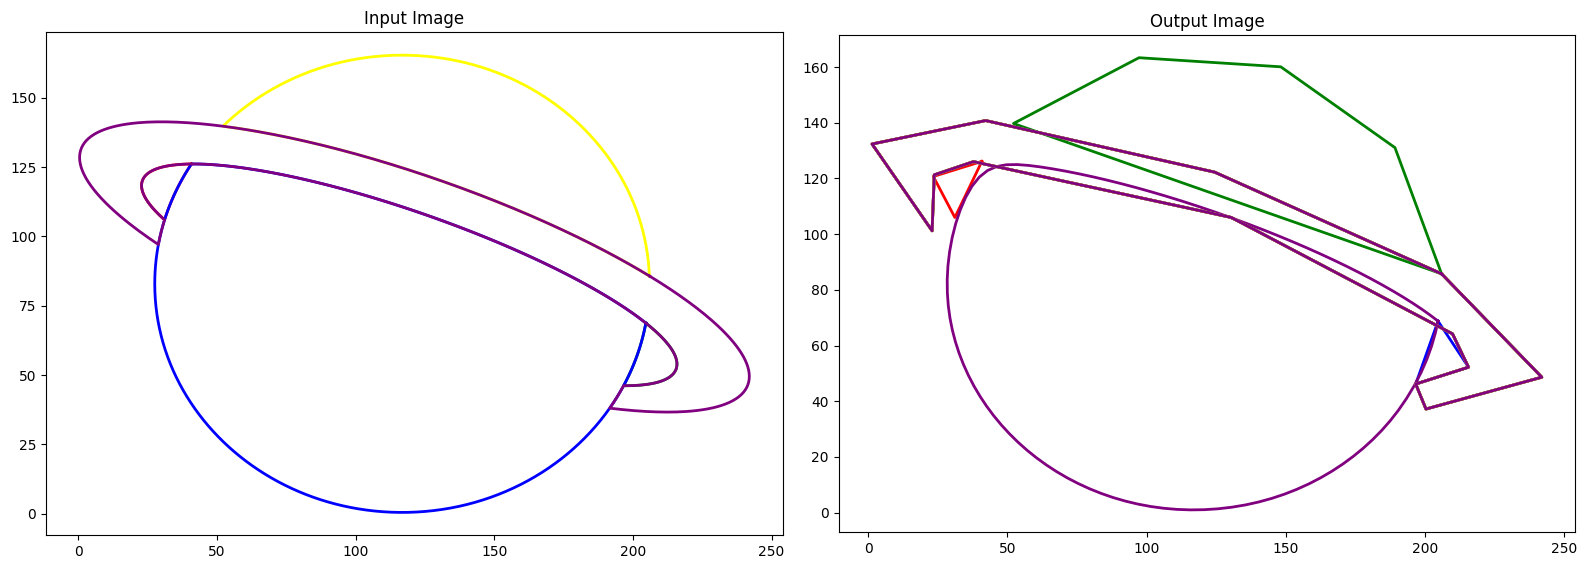

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.neighbors import NearestNeighbors
import math

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs, title, ax):
    colours = ['red', 'green', 'blue', 'yellow', 'purple']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        if isinstance(XYs, list):
            for XY in XYs:
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
        else:
            ax.plot(XYs[:, 0], XYs[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

def fit_circle(points):
    def calc_R(xc, yc):
        return np.sqrt((points[:, 0] - xc)**2 + (points[:, 1] - yc)**2)

    def f_2(c):
        Ri = calc_R(*c)
        return np.sum((Ri - Ri.mean())**2)

    center_estimate = np.mean(points, axis=0)
    center = minimize(f_2, center_estimate).x
    radius = calc_R(*center).mean()
    return center, radius

def fit_ellipse(points):
    x = points[:, 0]
    y = points[:, 1]
    x_m = np.mean(x)
    y_m = np.mean(y)
    def calc_R(params):
        a, b, phi = params
        return (x - x_m)*np.cos(phi) + (y - y_m)*np.sin(phi), (y - y_m)*np.cos(phi) - (x - x_m)*np.sin(phi)

    def f_2(params):
        a, b, phi = params
        R = calc_R(params)
        return np.sum((R[0]**2 / a**2 + R[1]**2 / b**2 - 1)**2)

    center_estimate = (np.std(x), np.std(y), 0)
    a, b, phi = minimize(f_2, center_estimate).x
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = x_m + a * np.cos(theta) * np.cos(phi) - b * np.sin(theta) * np.sin(phi)
    ellipse_y = y_m + a * np.cos(theta) * np.sin(phi) + b * np.sin(theta) * np.cos(phi)
    return np.vstack((ellipse_x, ellipse_y)).T

def perpendicular_distance(point, line_start, line_end):
    if np.all(line_start == line_end):
        return np.linalg.norm(point - line_start)
    else:
        return np.linalg.norm(np.cross(line_end - line_start, line_start - point)) / np.linalg.norm(line_end - line_start)

def ramer_douglas_peucker(points, epsilon):
    dmax = 0
    index = 0
    end = len(points)

    for i in range(1, end - 1):
        d = perpendicular_distance(points[i], points[0], points[-1])
        if d > dmax:
            index = i
            dmax = d
    if dmax > epsilon:
        rec_results1 = ramer_douglas_peucker(points[:index+1], epsilon)
        rec_results2 = ramer_douglas_peucker(points[index:], epsilon)
        result_list = np.vstack((rec_results1[:-1], rec_results2))
    else:
        result_list = np.array([points[0], points[-1]])

    return result_list

def fit_bezier(points, n_points=100):
    n = len(points) - 1
    binom = np.array([math.factorial(n) / (math.factorial(i) * math.factorial(n - i)) for i in range(n + 1)])
    t = np.linspace(0, 1, n_points)
    curve = np.zeros((n_points, 2))
    for i in range(n + 1):
        curve[:, 0] += binom[i] * (1 - t)**(n - i) * t**i * points[i, 0]
        curve[:, 1] += binom[i] * (1 - t)**(n - i) * t**i * points[i, 1]
    return curve

def icp(source, target, max_iterations=100, tolerance=1e-5):
    source = source.copy()
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(target)
    for i in range(max_iterations):
        distances, indices = nbrs.kneighbors(source)
        matched_target = target[indices[:, 0]]
        centroid_source = np.mean(source, axis=0)
        centroid_target = np.mean(matched_target, axis=0)
        H = np.dot((source - centroid_source).T, matched_target - centroid_target)
        U, _, Vt = np.linalg.svd(H)
        R = np.dot(Vt.T, U.T)
        t = centroid_target - np.dot(R, centroid_source)
        source = np.dot(source, R.T) + t
        if np.mean(distances) < tolerance:
            break
    return source

def merge_segments(paths_XYs, overlap_threshold=5):
    merged_paths = []
    for i, path1 in enumerate(paths_XYs):
        merged = False
        for j, path2 in enumerate(paths_XYs[i+1:], i+1):
            if np.linalg.norm(np.mean(path1[0], axis=0) - np.mean(path2[0], axis=0)) < overlap_threshold:
                merged_path = np.vstack([path1[0], icp(path1[0], path2[1])])
                merged_path = np.unique(merged_path, axis=0)
                merged_paths.append(merged_path)
                merged = True
        if not merged:
            merged_paths.append(path1[0])
            merged_paths.append(path2[0])
    return merged_paths

def regularize_paths(paths_XYs, epsilon):
    merged_paths = merge_segments(paths_XYs)

    simplified_paths = []
    for path in merged_paths:
        simplified_segment = ramer_douglas_peucker(path, epsilon)
        fitted_segment = []
        if len(simplified_segment) > 11 and len(simplified_segment) < 13:
            center, radius = fit_circle(simplified_segment)
            theta = np.linspace(0, 2 * np.pi, 100)
            x = center[0] + radius * np.cos(theta)
            y = center[1] + radius * np.sin(theta)
            fitted_segment = np.vstack((x, y)).T
        elif len(simplified_segment) > 11 and np.mean(simplified_segment[:, 1]) < 50:
            fitted_segment = fit_ellipse(simplified_segment)
        elif len(simplified_segment) > 6 and len(simplified_segment) < 10:
            fitted_segment = fit_bezier(path)
        else:
            fitted_segment = simplified_segment

        simplified_paths.append(fitted_segment)

    return simplified_paths

csv_path1 = "/content/occlusion2.csv"

paths_XYs = read_csv(csv_path1)

epsilon = 8
fitted_paths = regularize_paths(paths_XYs, epsilon)

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(paths_XYs, 'Input Image', axs[0])
plot(fitted_paths, 'Output Image', axs[1])
plt.show()